In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

# For ploting
import matplotlib.pyplot as plt

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('/content/drive/MyDrive/Dataset/','Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(labels)

[ 0  0  0 ... 42 42 42]


In [ ]:
print(data)

[[[[180 140 127]
   [198  88  80]
   [181  47  39]
   ...
   [168  79  73]
   [152 101  97]
   [ 94  77  74]]

  [[197 124 103]
   [179  60  40]
   [164  53  48]
   ...
   [168  55  39]
   [173  92  91]
   [126  89  89]]

  [[183  76  79]
   [177  49  41]
   [178  62  62]
   ...
   [158  42  34]
   [160  66  64]
   [159 102  94]]

  ...

  [[139 136 144]
   [139 136 147]
   [141 137 141]
   ...
   [ 81  81  77]
   [123 120 120]
   [132 131 133]]

  [[180 181 187]
   [183 180 187]
   [179 178 185]
   ...
   [ 75  82  87]
   [122 129 135]
   [157 158 164]]

  [[186 187 195]
   [192 186 195]
   [183 181 192]
   ...
   [ 71  77  68]
   [ 84  93  85]
   [110 112 108]]]


 [[[ 84  63  57]
   [ 76  63  56]
   [ 84  69  60]
   ...
   [ 51  44  36]
   [ 53  45  37]
   [ 54  45  36]]

  [[ 85  72  65]
   [ 88  74  64]
   [ 92  74  65]
   ...
   [ 54  44  37]
   [ 57  47  39]
   [ 61  48  40]]

  [[ 89  86  70]
   [ 83  78  57]
   [ 86  79  56]
   ...
   [ 60  51  42]
   [ 61  52  43]
   [ 61  48

In [ ]:
len(labels)

39239

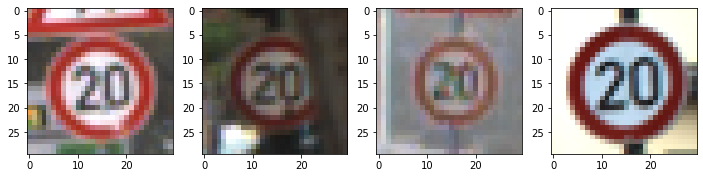

In [ ]:
plt.figure(figsize = (12,12))

for i in range(4) :
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap='gray')

plt.show()

In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
ls 

drive/  sample_data/


In [ ]:
len(os.listdir('/content/drive/MyDrive/Dataset/Train'))

43

In [ ]:
train_path = '/content/drive/MyDrive/Dataset/Train'
folders = os.listdir(train_path)

images_counts = { classes[int(folder)] : len(os.listdir(os.path.join(train_path, folder))) for folder in folders}
images_counts = sorted(images_counts.items(), key=lambda kv: (kv[1], kv[0]), reverse=True)

In [ ]:
len(images_counts)

43

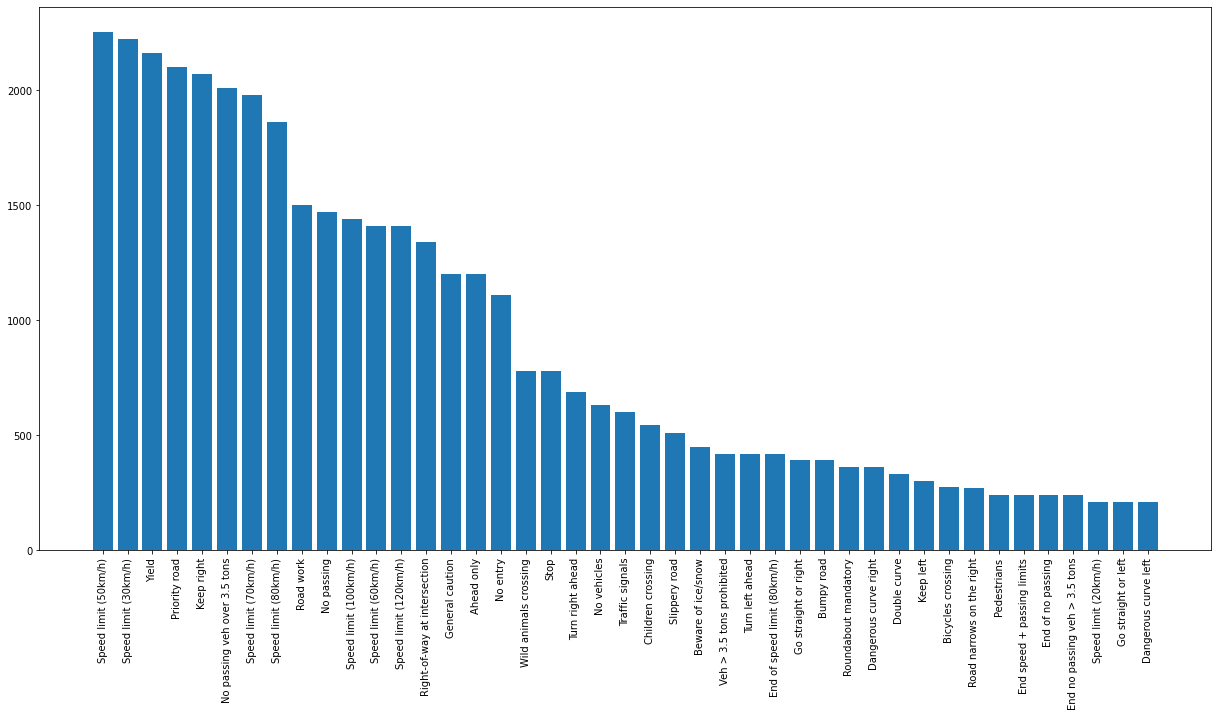

In [ ]:
x = [ c[0] for c in images_counts]
y = [ c[1] for c in images_counts]
plt.figure(figsize=(21,10)) 
plt.bar(x, y)
plt.xticks(x, rotation='vertical')
plt.show()

In [ ]:
#DATA SPLITTING AND CONVERTION



# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39239, 30, 30, 3) (39239,)
(31391, 30, 30, 3) (7848, 30, 30, 3) (31391,) (7848,)


In [ ]:
#CREATING AND COMPILING THE MODEL


# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [ ]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 15
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

In [ ]:
# Plotting performance graphs
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('/content/drive/MyDrive/Dataset/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('/content/drive/MyDrive/Dataset/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


In [ ]:
# Saving the Model 
model.save('MyDrive/Dataset/traffic_classifier.h5')

In [ ]:
model_json = model.to_json()
with open("MyDrive/Dataset/model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

In [ ]:
img = tf.keras.utils.load_img(
    '00217.png', target_size=(30,30)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score))
)